### Goal
- To be familar with data analysis workflow 
- To analysis the conservation statueses of the species in different parks
- To investigate if there is any pattern to the type of species being endangered

### Data
- The data is from National Parks Service about endangered species in different parks
- There are two file. One is `species_info.csv`, containing the information about the name and category of species and the conservation status. 
- Another is `observations.csv`, containing the information about the count of each species at each of the four park for the past 7 days.

### Analysis
In this project, I will try to perform descriptive analysis. Specifically I will try to answer the following questions:
- What is the distribution of `conservation_status`? i.e. What is the proportion of endangered species among all species?
- Are certain types of species more likely to be endangered?
- Are the difference between category of species and their conservation status significant?
- What is the most common animal at each park/ for all park?

In [2]:
# import the neccessary library 
import pandas as pd 
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt 
%matplotlib inline 

#### Data inspection
- Look at the context of data (feature name)
- Look at the size of data 
- Look at the data type and number of missing value 
- Look at the class label for categorical feature

In [3]:
df_obs = pd.read_csv("observations.csv")
df_species = pd.read_csv("species_info.csv")

In [4]:
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [7]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


- It seems that there is a lot of missing value in the column `sconservation_status`
- Maybe we need to fill in these value later

In [8]:
# check for column categorical label 
for col in df_species.columns:
    if df_species[col].dtypes == "object":
        print(col+ " : " + str(df_species[col].unique()))

category : ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
scientific_name : ['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']
common_names : ["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']
conservation_status : [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [9]:
for col in df_obs.columns:
    if df_obs[col].dtypes == "object":
        print(col+ " categorical label: " + str(df_obs[col].unique()))

scientific_name categorical label: ['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']
park_name categorical label: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


#### Data Transformation
- Fill in the missing value with a new category called `"Not Evaluated"`
- Create a new column called `"endangered"` to show whether a species is endangered  

In [10]:
df_species.conservation_status.fillna("Not Evaluated", inplace=True)
df_species.conservation_status.value_counts()

Not Evaluated         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [11]:
df_species["endangered"] = (df_species.conservation_status != "Not Evaluated")
df_species.endangered.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9     True
Name: endangered, dtype: bool

#### What is the distribution of `conservation_status`?

In [12]:
df_species.endangered.value_counts()

False    5633
True      191
Name: endangered, dtype: int64

In [13]:
191/(5633+191) *100

3.279532967032967

- We have most of the species being well protected.
- 3.28% of all speces are endangered or have chance to be endangered

#### Are certain types of species more likely to be endangered?

In [14]:
# count the # of endangered species in each category, and sort category by their count
endangeredByCat = df_species.groupby(by = "category").endangered.sum().sort_values(ascending = False )
order = endangeredByCat.index
endangeredByCat

category
Bird                 79
Vascular Plant       46
Mammal               38
Fish                 11
Amphibian             7
Nonvascular Plant     5
Reptile               5
Name: endangered, dtype: int64

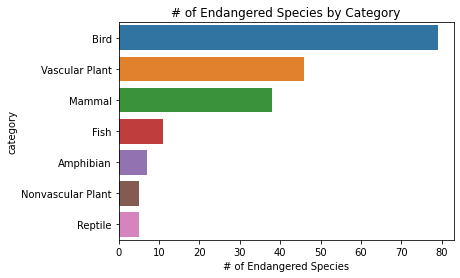

In [15]:
plt.clf()
ax = sns.barplot(
    data  = df_species,
    y = "category",
    x = "endangered",
    estimator = np.sum,
    ci = None,
    order = order
)
ax.set(
    title = "# of Endangered Species by Category",
    xlabel = "# of Endangered Species"
)
plt.show()

- It seems that species that in Bird, Vascular Plant and Mammal these three category are most likely to be endangered

#### Are the difference between category of species and their conservation status significant?

In [16]:
from itertools import combinations
from scipy.stats import chi2_contingency

def rSubSet(arr, r):
    """
    retrun list of all subsets of length r 
    """
    return list(combinations(arr, r))

# create a frequency table for category vs endangered 
xtab = pd.crosstab(
    index = df_species.category,
    columns = df_species.endangered
)

# run chi2 test for two categorical varible and set significant threshold as 5%
for xgp, ygp in rSubSet(xtab.index, 2):
    obs = xtab.loc[[xgp, ygp]]
    chi2, p, dof, ex = chi2_contingency(obs, correction=False)
    decision = "reject" if p <.05 else "fail to reject"
    if decision == "reject":
        print(f"{xgp} vs {ygp} : {decision}")


Amphibian vs Nonvascular Plant : reject
Amphibian vs Vascular Plant : reject
Bird vs Nonvascular Plant : reject
Bird vs Reptile : reject
Bird vs Vascular Plant : reject
Fish vs Mammal : reject
Fish vs Nonvascular Plant : reject
Fish vs Vascular Plant : reject
Mammal vs Nonvascular Plant : reject
Mammal vs Reptile : reject
Mammal vs Vascular Plant : reject
Nonvascular Plant vs Reptile : reject
Reptile vs Vascular Plant : reject


- Group `Nonvascular`, `Vascular Plant` are statisically differnent from other group, but group `Bird` and `Mammal` don't have it.
- Why is it the case?

In [17]:
xtab_norm = pd.crosstab(
    index = df_species.category,
    columns = df_species.endangered,
    normalize  = "index"
)
xtab_norm

endangered,False,True
category,,
Amphibian,0.912500,0.087500
Bird,0.848369,0.151631
Fish,0.913386,0.086614
Mammal,0.822430,0.177570
Nonvascular Plant,0.984985,0.015015
Reptile,0.936709,0.063291
Vascular Plant,0.989709,0.010291


- If we look at the probability of being endangered for each category of species, `Nonvascular` and `Vascular Plant` are less likely to be endangered 
- But `Bird` and `Mammal` have similar probability (about 15% !) to be endangered

#### What is the most common animal at each park/ for all park?

In [25]:
# first lets combine the observation and species dataset 
merge_df = pd.merge(
    left = df_obs ,
    right = df_species,
    on = "scientific_name"
)
merge_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,endangered
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Evaluated,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Evaluated,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Evaluated,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Evaluated,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Evaluated,False


In [26]:
# create a grouping for animal species and sum up all the observation in each park
pd.set_option('display.max_rows',100)
# filter out all the species that isn't animal
condit1 = np.isin(merge_df.category, ["Vascular Plant", "Nonvascular Plant"], invert=True)
# get the top 500 animal having most of the obseravations
topThousand = merge_df[condit1]\
    .groupby(["common_names"])\
    .observations\
    .sum()\
    .sort_values(ascending = False)\
    .reset_index()\
    .head(500)

- find the most common word among top 500 animal to get a sense of what is the most common animal 

In [27]:
common_word = []
# split the word by all non-word character and white space 
for lst in topThousand.common_names.str.split(r"[\W\s]+"):
    # turn the list into set to avoid duplicate value 
    for element in set(lst):
        common_word.append(element)

common_word = pd.Series(common_word)
print(common_word.value_counts().head(5))


Warbler     29
s           28
Northern    27
Black       26
Common      22
dtype: int64


- We find that the most common animals are belong to `Warbler`


The following question can be:
- What is the obseravtion of them in each park? 
- In which park they are most often to appear?
- Are they well protected in each park?


In [28]:
merge_df["isWarbler"] = merge_df.\
    common_names.str.contains(r"\bWarbler\b")
warbler_df = merge_df[merge_df["isWarbler"] == True]
warbler_pivot = warbler_df\
    .groupby(["park_name", "endangered"])\
    .observations.sum().reset_index()\
    .pivot(index = "park_name", columns = "endangered")
warbler_pivot

observations     
endangered                                 False True
park_name                                            
Bryce National Park                         5565  195
Great Smoky Mountains National Park         4290  145
Yellowstone National Park                  13995  492
Yosemite National Park                      8441  271

In [29]:
new2dArr = []
for lst in warbler_pivot.values:
    tmpLst = []
    sumVal = lst.sum()
    for val in lst:
        tmpLst.append(val/ sumVal)
    new2dArr.append(tmpLst)
percent_df = pd.DataFrame(new2dArr, columns=["percentFalse", "percentTrue"])
percent_df.index = warbler_pivot.index
percent_df

,percentFalse,percentTrue
park_name,,
Bryce National Park,0.966146,0.033854
Great Smoky Mountains National Park,0.967306,0.032694
Yellowstone National Park,0.966039,0.033961
Yosemite National Park,0.968893,0.031107


From the above normalized frequency table, we can see that:
- Warbler most likely to be in `Yellowstone National Park`.
- Probably, The four park do a similar job to protect the `Warbler`, as the percentage of observed and not endangered Warbler  are similar 
- The endangered `Warbler` have relative few observations in each park 

#### Conclusion
- There are 3.28% of all species being endangered 
- The species of Bird and Mammal have high chance to be endangered 
- The most common animal obeserved from a park is Warbler. You most likely to see them in `Yellowstone National Park`.

#### Further Question
- Can we use the observed information to deduce which species is being endangered ?
- What animals among Fish/ Bird/ Mammal are more likely to be endangered?